# <b> BANGALORE HOUSE PRICEPREDICTION MODEL <b>

### IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### <b> LOAD DATASET <b>

In [4]:
df1=pd.read_csv("3. Bengaluru_House_Data.csv")

In [5]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## EXPLORATORY DATA ANALYSIS

In [7]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### DROP UNNECESSARY FEATURES

In [9]:
df2=df1.drop(["area_type", "society", "balcony", "availability"],axis="columns")
df2.shape

(13320, 5)

In [10]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### <b> DATA CLEANING <b>

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3=df2.dropna()

In [14]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
s1="3 bhk"
int(s1.split()[0])

3

In [16]:
df3.shape

(13246, 5)

## <b> FEATURE ENGINEERING <B>

In [18]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## EXPLORE TOTAL SQFT FEATURE

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
s1="3090-5002"
x=s1.split("-")
(int(x[0])+int(x[1]))/2

4046.0

#### <B>Above data shows that total sqft can be a range (example 2100-2850) for such cases we can just take average of min and max value in the range. there are other cases where values are in SQM which can be converted to SQFT unit using conversation<B>

In [26]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df4=df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4= df4[df4.total_sqft.notnull()]
df4.shape

(13200, 6)

### Add New Feature Called Price Square Feet

In [29]:
df5=df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### <b>Examin location which is a categorical variable . we need to apply the Dimensionality reduction technique here to reduce the number of location<b>


In [31]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats= df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [32]:
len(location_stats[location_stats>10])

240

In [33]:
len(location_stats)

1287

In [34]:
len(location_stats[location_stats<=10])

1047

## <b> DIMENSIONALITY REDUCTIONS<b>

#### Any location having less than 10 data pints should be tagged as "other" location. this way number of categories can be reduced by huge amount. later on when we do one hot encoding, it will help us with having fewer dummy columns

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [37]:
df5.location = df5.location.apply(lambda x: "unknown" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [38]:
df5.location.value_counts()

location
unknown            2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [39]:
df5.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [40]:
df5["bhk"] = df5.bhk.apply(lambda x: x if x<=11 else np.nan)
df5.bhk.unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 10.])

In [41]:
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               8
price_per_sqft    0
dtype: int64

In [42]:
df5["bhk"].fillna(df5["bhk"].mode()[0],inplace=True)

In [43]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,unknown,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


## <b> OUTLIER REMOVAL USING BUSINBESS LOGIC <b>


#### As a data scientist s a data scientist when you have a conversation with your  business manager ( who has experience in real estate) . he will tell you that normally square ft per bathroom is 300(i.e 2 bhk appartment is minimum 600 sqft. if you  have for example 400 sqft apartment with 2 bhk then that seems suspecious and can be removed as an outlier .we will remove such outlier by keeping our minimum thresold per bhk to be 300 sqft

In [45]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,unknown,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,unknown,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


#### Check the above data points, we have 6 bhk apartments with 1020 sqft. another one is 8 bhkk and the total sqft is 600. these are clear data errors that can be remove safely

In [47]:
df5.shape

(13200, 7)

In [48]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12462, 7)

### <B> OUTLIER REMOVAL USING BATHROOMS FEATURE <B>

In [50]:
df6.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 27., 12., 16.,
       40., 15., 10., 13., 18.])

In [51]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,unknown,9 Bedroom,3300.0,14.0,500.0,9.0,15151.515152
1718,unknown,27 BHK,8000.0,27.0,230.0,2.0,2875.000000
3096,unknown,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
3379,unknown,19 BHK,2000.0,16.0,490.0,2.0,24500.000000
3609,unknown,16 BHK,10000.0,16.0,550.0,2.0,5500.000000
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,2.0,27500.000000
4916,unknown,14 BHK,1250.0,15.0,125.0,2.0,10000.000000
7979,unknown,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
9935,unknown,13 BHK,5425.0,13.0,275.0,2.0,5069.124424


### It is unsusal to have 2 more bathroom than number of bedrooms in a home

In [53]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,unknown,9 Bedroom,3300.0,14.0,500.0,9.0,15151.515152
1718,unknown,27 BHK,8000.0,27.0,230.0,2.0,2875.000000
2620,unknown,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689
3379,unknown,19 BHK,2000.0,16.0,490.0,2.0,24500.000000
3609,unknown,16 BHK,10000.0,16.0,550.0,2.0,5500.000000
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,2.0,27500.000000
4916,unknown,14 BHK,1250.0,15.0,125.0,2.0,10000.000000
6533,Mysore Road,12 Bedroom,2232.0,6.0,300.0,2.0,13440.860215
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5.0,22666.666667
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520


### Again the business manager has a conversation with you (i.e a data scientist) that if you have a 4 bedroom home and even if you have a bathroom in all 4 rooms plus guest bathroom , you will have a total bath= total bed + 1 max. anything above that is an outlier or a data error and can be removed.

In [55]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(12301, 7)

In [56]:
df8= df7.drop(["size","price_per_sqft"],axis="columns")
df8.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [57]:
# for i column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df8["location"]=le.fit_transform(df8["location"])

In [58]:
df8.head()

,location,total_sqft,bath,price,bhk
0,79,1056.0,2.0,39.07,2.0
1,60,2600.0,5.0,120.00,4.0
2,225,1440.0,2.0,62.00,3.0
3,159,1521.0,3.0,95.00,3.0
4,151,1200.0,2.0,51.00,2.0


In [59]:
x=df8.drop("price",axis=1)
y=df8["price"]

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr=LinearRegression()

##### <b> Im a jupyter environment,please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render,please try loading this page with nbviewer.org.<b>

In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred=lr.predict(x_test)
cal=pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_price","Predicted_price"])
cal

,Actual_price,Predicted_price
0,18.0,2.986041
1,23.5,-5.324339
2,128.0,59.940366
3,45.0,70.948938
4,75.0,57.978599
...,...,...
2456,95.0,70.461644
2457,155.0,158.848079
2458,72.0,54.604003
2459,115.0,92.452253


### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

### Decision Tree Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

### Evaluating Models

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_pred, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Linear Regression ---
MAE: 41.27655406945101
MSE: 7891.059177774753
RMSE: 88.83163387991213
R2 Score: 0.49566235239449785


--- Decision Tree ---
MAE: 35.4087431174392
MSE: 11118.55754205318
RMSE: 105.44457094631842
R2 Score: 0.28938472907171753


--- Random Forest ---
MAE: 30.663377848302897
MSE: 7567.935157066987
RMSE: 86.99387999777333
R2 Score: 0.5163140297951153




In [73]:
print("Linear R2:", r2_score(y_test, y_pred))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear R2: 0.49566235239449785
Decision Tree R2: 0.28938472907171753
Random Forest R2: 0.5163140297951153


### Checking Feature Importance

In [75]:

# Getting feature importance from Random Forest model
importance = rf_model.feature_importances_

# Creating dataframe using X columns (not df)
feature_importance = pd.DataFrame({
    "Feature": x.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feature_importance.head()



,Feature,Importance
1,total_sqft,0.760367
0,location,0.117607
2,bath,0.066834
3,bhk,0.055191


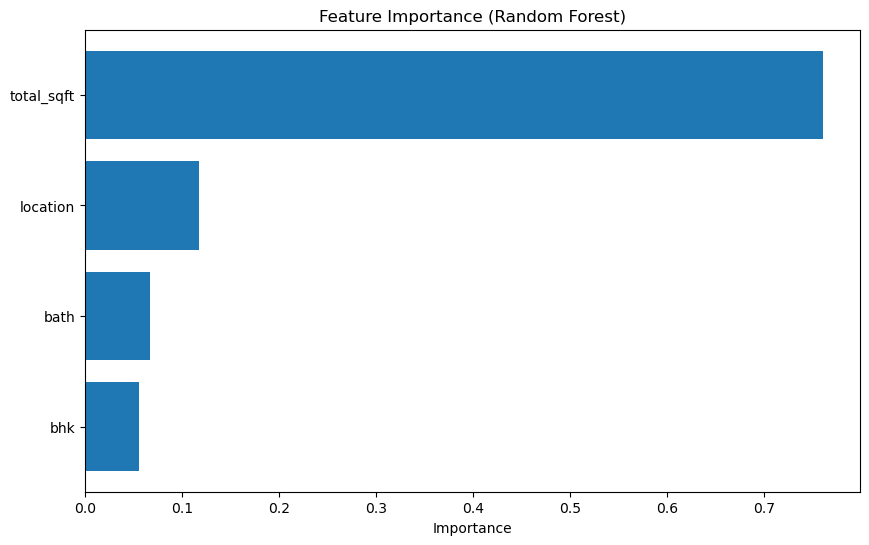

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()
